In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df_ = pd.read_csv("/content/live_model_credit.csv")
# filtering the data
df_.isna().sum()

df_.dropna(inplace=True,axis =0)
df_

,CreditScore,Gender,Age,Tenure (Yrs),Outstanding Amt,EstimatedSalary,Exited
0,557,Female,42,2,0.00,101348.88,1
1,719,Female,41,1,83807.86,112542.58,0
2,763,Female,42,8,159660.80,113931.57,1
3,517,Female,39,1,0.00,93826.63,0
4,771,Female,43,2,125510.82,79084.10,0
...,...,...,...,...,...,...,...
9995,562,Male,39,5,0.00,96270.64,0
9996,565,Male,35,10,57369.61,101699.77,0
9997,583,Female,36,7,0.00,42085.58,1
9998,540,Male,42,3,75075.31,92888.52,1


In [ ]:
# defining the independent and dependent variable
x_var = df_.iloc[:,1:6].values
y_var = df_["Exited"].values
x_var.shape

(10000, 5)

In [ ]:
# assigning the numeric value for the gender by using the label encoding
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose  import ColumnTransformer
df_numeric = ColumnTransformer([("Gender",OneHotEncoder(),[0])],remainder="passthrough")
x_var = df_numeric.fit_transform(x_var)
x_var

array([[1.0, 0.0, 42, 2, 0.0, 101348.88],
       [1.0, 0.0, 41, 1, 83807.86, 112542.58],
       [1.0, 0.0, 42, 8, 159660.8, 113931.57],
       ...,
       [1.0, 0.0, 36, 7, 0.0, 42085.58],
       [0.0, 1.0, 42, 3, 75075.31, 92888.52],
       [1.0, 0.0, 28, 4, 130142.79, 38190.78]], dtype=object)

In [ ]:
x_var_df = pd.DataFrame(x_var, columns = ["x1","x2", "Age", "Tenure (Yrs)", "Outstanding Amt", "EstimatedSalary"]
)
x_var_df.drop("x2",axis=1,inplace=True)
x_var_df


,x1,Age,Tenure (Yrs),Outstanding Amt,EstimatedSalary
0,1.0,42,2,0.0,101348.88
1,1.0,41,1,83807.86,112542.58
2,1.0,42,8,159660.8,113931.57
3,1.0,39,1,0.0,93826.63
4,1.0,43,2,125510.82,79084.1
...,...,...,...,...,...
9995,0.0,39,5,0.0,96270.64
9996,0.0,35,10,57369.61,101699.77
9997,1.0,36,7,0.0,42085.58
9998,0.0,42,3,75075.31,92888.52


## note here we can also use the labelencoding

In [ ]:
# spiliting the training and testing data
from sklearn.model_selection import train_test_split
# spliting the data from 20% and taking the random state 0 for simplicity
x_train, x_test,y_train,y_test = train_test_split(x_var_df,y_var,test_size =0.2,random_state=1)


In [ ]:
# Standardize the train and test data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
# as  we know usin the tarined data mean and variance
x_test = sc.transform(x_test)

In [ ]:

# statistical tools
import statsmodels.api as sm
# the model drop the constant so for validty of the markov property
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# logistic regression
classifier = sm.Logit(y_train, x_train)
model = classifier.fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.456002
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7994
Method:                           MLE   Df Model:                            5
Date:                Thu, 02 May 2024   Pseudo R-squ.:                 0.09558
Time:                        15:03:50   Log-Likelihood:                -3648.0
converged:                       True   LL-Null:                       -4033.5
Covariance Type:            nonrobust   LLR p-value:                2.135e-164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5327      0.032    -48.600      0.000      -1.594      -1.471
x1             0.2721      0.029      9.265      0.000       0.215       0.330
x2             0.6472      0.028     23.091      0.000       0.592       0.702
x3            -0.0092      0.029     -0.315      0.752      -0.067       0.048
x4             0.3160      0.030     10.393      0.000       0.256       0.376
x5             0.0237      0.029      0.805      0.421      -0.034       0.082
==============================================================================
"""

accuracy 0.787


<Axes: >

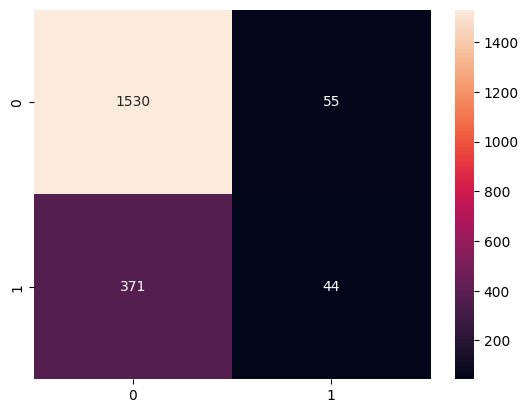

In [ ]:
import seaborn as sns
from sklearn import metrics
y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)
print("accuracy", metrics.accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="")